In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.5.3


### DataFrame 구조
- index(row) - column(column) - data

In [3]:
num_list = [10, 20, 30, 40, 50]
pd.DataFrame(data=num_list)

,0
0,10
1,20
2,30
3,40
4,50


In [4]:
double_list = [
             [1000, '과자','2019-12-31','반품'],
             [2000, '음료', '2020-03-02', '정상'],
             [3000, '아이스크림', '2020-02-03','정상'],
             [1000,'과자','2019-12-31','반품']
            ]
pd.DataFrame(data=double_list)

,0,1,2,3
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [5]:
double_columns = ['가격','종류','판매일자','반품여부']
df_saledays = pd.DataFrame(data=double_list, columns=double_columns)
df_saledays

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [6]:
type(df_saledays)

pandas.core.frame.DataFrame

In [7]:
df_saledays.columns, type(df_saledays.columns), list(df_saledays.columns)

(Index(['가격', '종류', '판매일자', '반품여부'], dtype='object'),
 pandas.core.indexes.base.Index,
 ['가격', '종류', '판매일자', '반품여부'])

In [8]:
df_saledays.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
df_saledays.values

array([[1000, '과자', '2019-12-31', '반품'],
       [2000, '음료', '2020-03-02', '정상'],
       [3000, '아이스크림', '2020-02-03', '정상'],
       [1000, '과자', '2019-12-31', '반품']], dtype=object)

In [10]:
df_saledays_dropcol = df_saledays.drop(columns=['종류', '판매일자'])
# df_saledays.drop(columns=['종류', '판매일자'], inplace=True) #지정한 df 값이 변화한다.

In [11]:
df_saledays_dropcol

,가격,반품여부
0,1000,반품
1,2000,정상
2,3000,정상
3,1000,반품


In [12]:
## 필터 : and - &, or - |
# condition = (df_saledays_dropcol['반품여부'] == '정상')
condition = (df_saledays_dropcol['가격'] >= 2500)
df_saledays_dropcol.loc[condition]

,가격,반품여부
2,3000,정상


In [13]:
# 특정 범위 선택
# (df_saledays_dropcol['가격'] >= 2500) | (df_saledays_dropcol['가격'] <= 1000)
(df_saledays_dropcol['반품여부'] == '정상') & (df_saledays_dropcol['가격'] >= 2500)

0    False
1    False
2     True
3    False
dtype: bool

In [14]:
## 요약
# df_saledays_dropcol.pivot_table(index='반품여부', values='가격')
# pd.pivot_table(data=df_saledays_dropcol, index='반품여부', values='가격')
import numpy as np
df_saledays_dropcol.pivot_table(index='반품여부', values='가격', aggfunc=np.min)

,가격
반품여부,
반품,1000
정상,2000


In [15]:
pd.pivot_table(data=df_saledays_dropcol, index='반품여부', values='가격')

,가격
반품여부,
반품,1000
정상,2500


In [16]:
df_saledays.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size])

sum  amin size
              가격    가격   가격
반품여부 종류                    
반품   과자     2000  1000    2
정상   아이스크림  3000  3000    1
     음료     2000  2000    1

In [17]:
df_saledays # df_saledays['가격'].mean()

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [18]:
def mean_subtraction(cell_value) :
    result = 1750 - cell_value  # 가격 평균 - 개별값
    return result

In [19]:
mean_subtraction(750)

1000

In [20]:
df_saledays['가격'].apply(mean_subtraction)

0     750
1    -250
2   -1250
3     750
Name: 가격, dtype: int64

In [21]:
# 컬럼 추가
df_saledays['가격차이'] = df_saledays['가격'].apply(mean_subtraction) # 각 cell당 평균과 차이값

In [22]:
df_saledays

,가격,종류,판매일자,반품여부,가격차이
0,1000,과자,2019-12-31,반품,750
1,2000,음료,2020-03-02,정상,-250
2,3000,아이스크림,2020-02-03,정상,-1250
3,1000,과자,2019-12-31,반품,750


### Apply()

#### 단일변수

In [23]:
def mean_subtraction(cell_value) :
    result = 1750 - cell_value  # 가격 평균 - 개별값
    return result

In [42]:
mean_subtraction(750)

1000

In [24]:
df_saledays['가격'].apply(mean_subtraction)

0     750
1    -250
2   -1250
3     750
Name: 가격, dtype: int64

In [25]:
df_saledays['가격차이'] = df_saledays['가격'].apply(mean_subtraction)  # 각 cell당 평균 차이값

#### 다변수

In [26]:
df_saledays

,가격,종류,판매일자,반품여부,가격차이
0,1000,과자,2019-12-31,반품,750
1,2000,음료,2020-03-02,정상,-250
2,3000,아이스크림,2020-02-03,정상,-1250
3,1000,과자,2019-12-31,반품,750


In [27]:
df_saledays['가격'] + df_saledays['가격차이']

0    1750
1    1750
2    1750
3    1750
dtype: int64

### Series
- index - data

In [28]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
series_floats = pd.Series(data=single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [29]:
type(series_floats)

pandas.core.series.Series

### 통계 수치 표현

In [30]:
import numpy as np

In [31]:
arr = np.array([6, 4, 1, 3, 5, 3, 10, 7, 9])
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [32]:
# 평균, 합계
np.mean(arr), np.sum(arr)

(5.333333333333333, 48)

In [33]:
# 중앙값
np.median(arr)

5.0

In [34]:
# 최소값, 최대값
np.min(arr), np.max(arr)

(1, 10)

In [35]:
# 분산, 표준편차
np.var(arr), np.std(arr)

(7.777777777777778, 2.788866755113585)

### IQR

In [36]:
import numpy as np
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [37]:
import seaborn as sns

In [38]:
Q1 = np.percentile(data, 25)

In [39]:
Q3 = np.percentile(data, 75)

In [40]:
Q1, Q3, Q3 - Q1, np.median(data)

(33.0, 48.25, 15.25, 44.5)

<Axes: >

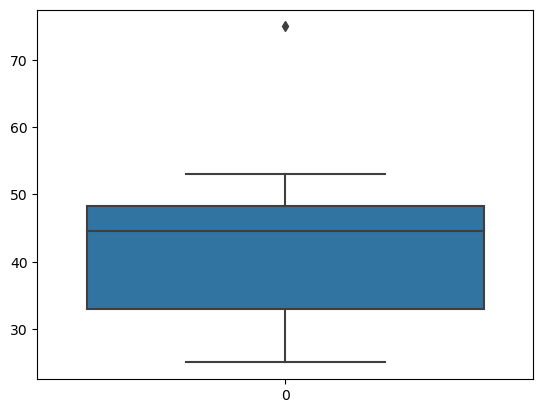

In [41]:
sns.boxplot(data)